In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("2_5339441868520325804.csv")
df

,id,a,b,c,d,e,f,g,h,sex,...,children,property,r,employment_status,t,u,v,w,x,target
0,1,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,Woman,...,2 Two,property,No,Works,Yes,Yes,No,Yes,No,0
1,2,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,Woman,...,2 Two,otherwise,No,Works,Yes,Yes,Yes,Yes,No,0
2,3,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,Woman,...,1 One,property,No,No couple,No,Yes,No,Yes,No,0
3,4,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,Woman,...,0 Zero,property,No,No couple,Yes,Yes,Few,Yes,No,0
4,5,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,Woman,...,0 Zero,property,No,No couple,Yes,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128134,38401,0.569320,0.237217,44.95,854.05,1.708100,0.711708,3,0.00,Man,...,0 Zero,property,No,Works,Yes,No,No,No,Yes,0
128135,38402,0.072727,0.072727,45.86,413.14,0.751164,0.751164,13,1.99,Woman,...,0 Zero,property,No,No couple,Yes,Yes,No,No,Yes,0
128136,38403,0.095750,0.095750,57.48,172.42,0.287367,0.287367,3,0.00,Woman,...,0 Zero,rent/hire,Yes,No couple,No,Yes,No,Yes,Yes,0
128137,38404,0.042287,0.042287,422.00,1266.00,0.844000,0.844000,20,0.01,Woman,...,1 One,property,Yes,No couple,Yes,Yes,No,No,Yes,0


In [53]:

print("Размерность датасета:", df.shape)
print("\nТипы данных:\n", df.dtypes)
print("\nПропущенные значения:\n", df.isnull().sum())



print(df.describe())


Размерность датасета: (128139, 26)

Типы данных:
 id                     int64
a                    float64
b                    float64
c                    float64
d                    float64
e                    float64
f                    float64
g                      int64
h                    float64
sex                   object
age                  float64
region                object
l                      int64
job_title             object
education             object
marriage              object
children              object
property              object
r                     object
employment_status     object
t                     object
u                     object
v                     object
w                     object
x                     object
target                 int64
dtype: object

Пропущенные значения:
 id                   0
a                    0
b                    0
c                    0
d                    0
e                    0
f                   

In [54]:
duplicates_count = df.duplicated().sum()
print("Количество полностью одинаковых строк:", duplicates_count)


Количество полностью одинаковых строк: 0


In [55]:
# Сколько всего записей
print("Всего записей:", len(df))

# Сколько уникальных ID
print("Уникальных ID:", df["id"].nunique())

# Сколько раз встречается каждый ID (топ-10)
print(df["id"].value_counts().head(100))


Всего записей: 128139
Уникальных ID: 89734
1        2
25599    2
25601    2
25602    2
25603    2
        ..
25578    2
25522    2
25507    2
25508    2
25509    2
Name: id, Length: 100, dtype: int64


In [56]:
df_sorted = df.sort_values(by="id")
df_sorted

,id,a,b,c,d,e,f,g,h,sex,...,children,property,r,employment_status,t,u,v,w,x,target
0,1,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,Woman,...,2 Two,property,No,Works,Yes,Yes,No,Yes,No,0
89734,1,0.085400,0.085400,29.72,267.28,0.763657,0.763657,13,3.49,Woman,...,1 One,property,No,No couple,Yes,Yes,No,No,No,0
1,2,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,Woman,...,2 Two,otherwise,No,Works,Yes,Yes,Yes,Yes,No,0
89735,2,0.223218,0.111609,0.00,1097.90,1.996182,0.998091,13,3.49,Woman,...,3 Three,property,No,Works,Yes,Yes,No,No,No,1
2,3,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,Woman,...,1 One,property,No,No couple,No,Yes,No,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89729,89730,0.027941,0.014844,25.00,474.00,0.557647,0.296250,20,0.01,Man,...,0 Zero,property,No,Works,Yes,Yes,No,No,Yes,0
89730,89731,0.120017,0.068581,179.96,720.03,1.200050,0.685743,10,0.00,Woman,...,2 Two,property,No,Works,Yes,Yes,No,No,Yes,0
89731,89732,0.153033,0.122427,29.01,550.99,0.459158,0.367327,3,0.00,Man,...,0 Zero,otherwise,No,Works,Yes,Yes,No,Yes,Yes,0
89732,89733,0.107575,0.043030,53.82,215.18,0.537950,0.215180,5,0.00,Woman,...,1 One,property,Yes,Works,No,Yes,No,No,Yes,0


In [57]:
# Считаем сколько раз встречается каждый ID
id_counts = df["id"].value_counts()

# Берём только повторяющиеся ID
duplicate_ids = id_counts[id_counts > 1].index

# Находим минимальный и максимальный ID среди повторяющихся
min_id = duplicate_ids.min()
max_id = duplicate_ids.max()

print("Минимальный повторяющийся ID:", min_id)
print("Максимальный повторяющийся ID:", max_id)

Минимальный повторяющийся ID: 1
Максимальный повторяющийся ID: 38405


In [58]:
# Определим категориальные признаки
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns = categorical_columns.drop('v')
print("Категориальные признаки:", list(categorical_columns))
print("\nКоличество категориальных признаков:", len(categorical_columns))

Категориальные признаки: ['sex', 'region', 'job_title', 'education', 'marriage', 'children', 'property', 'r', 'employment_status', 't', 'u', 'w', 'x']

Количество категориальных признаков: 13


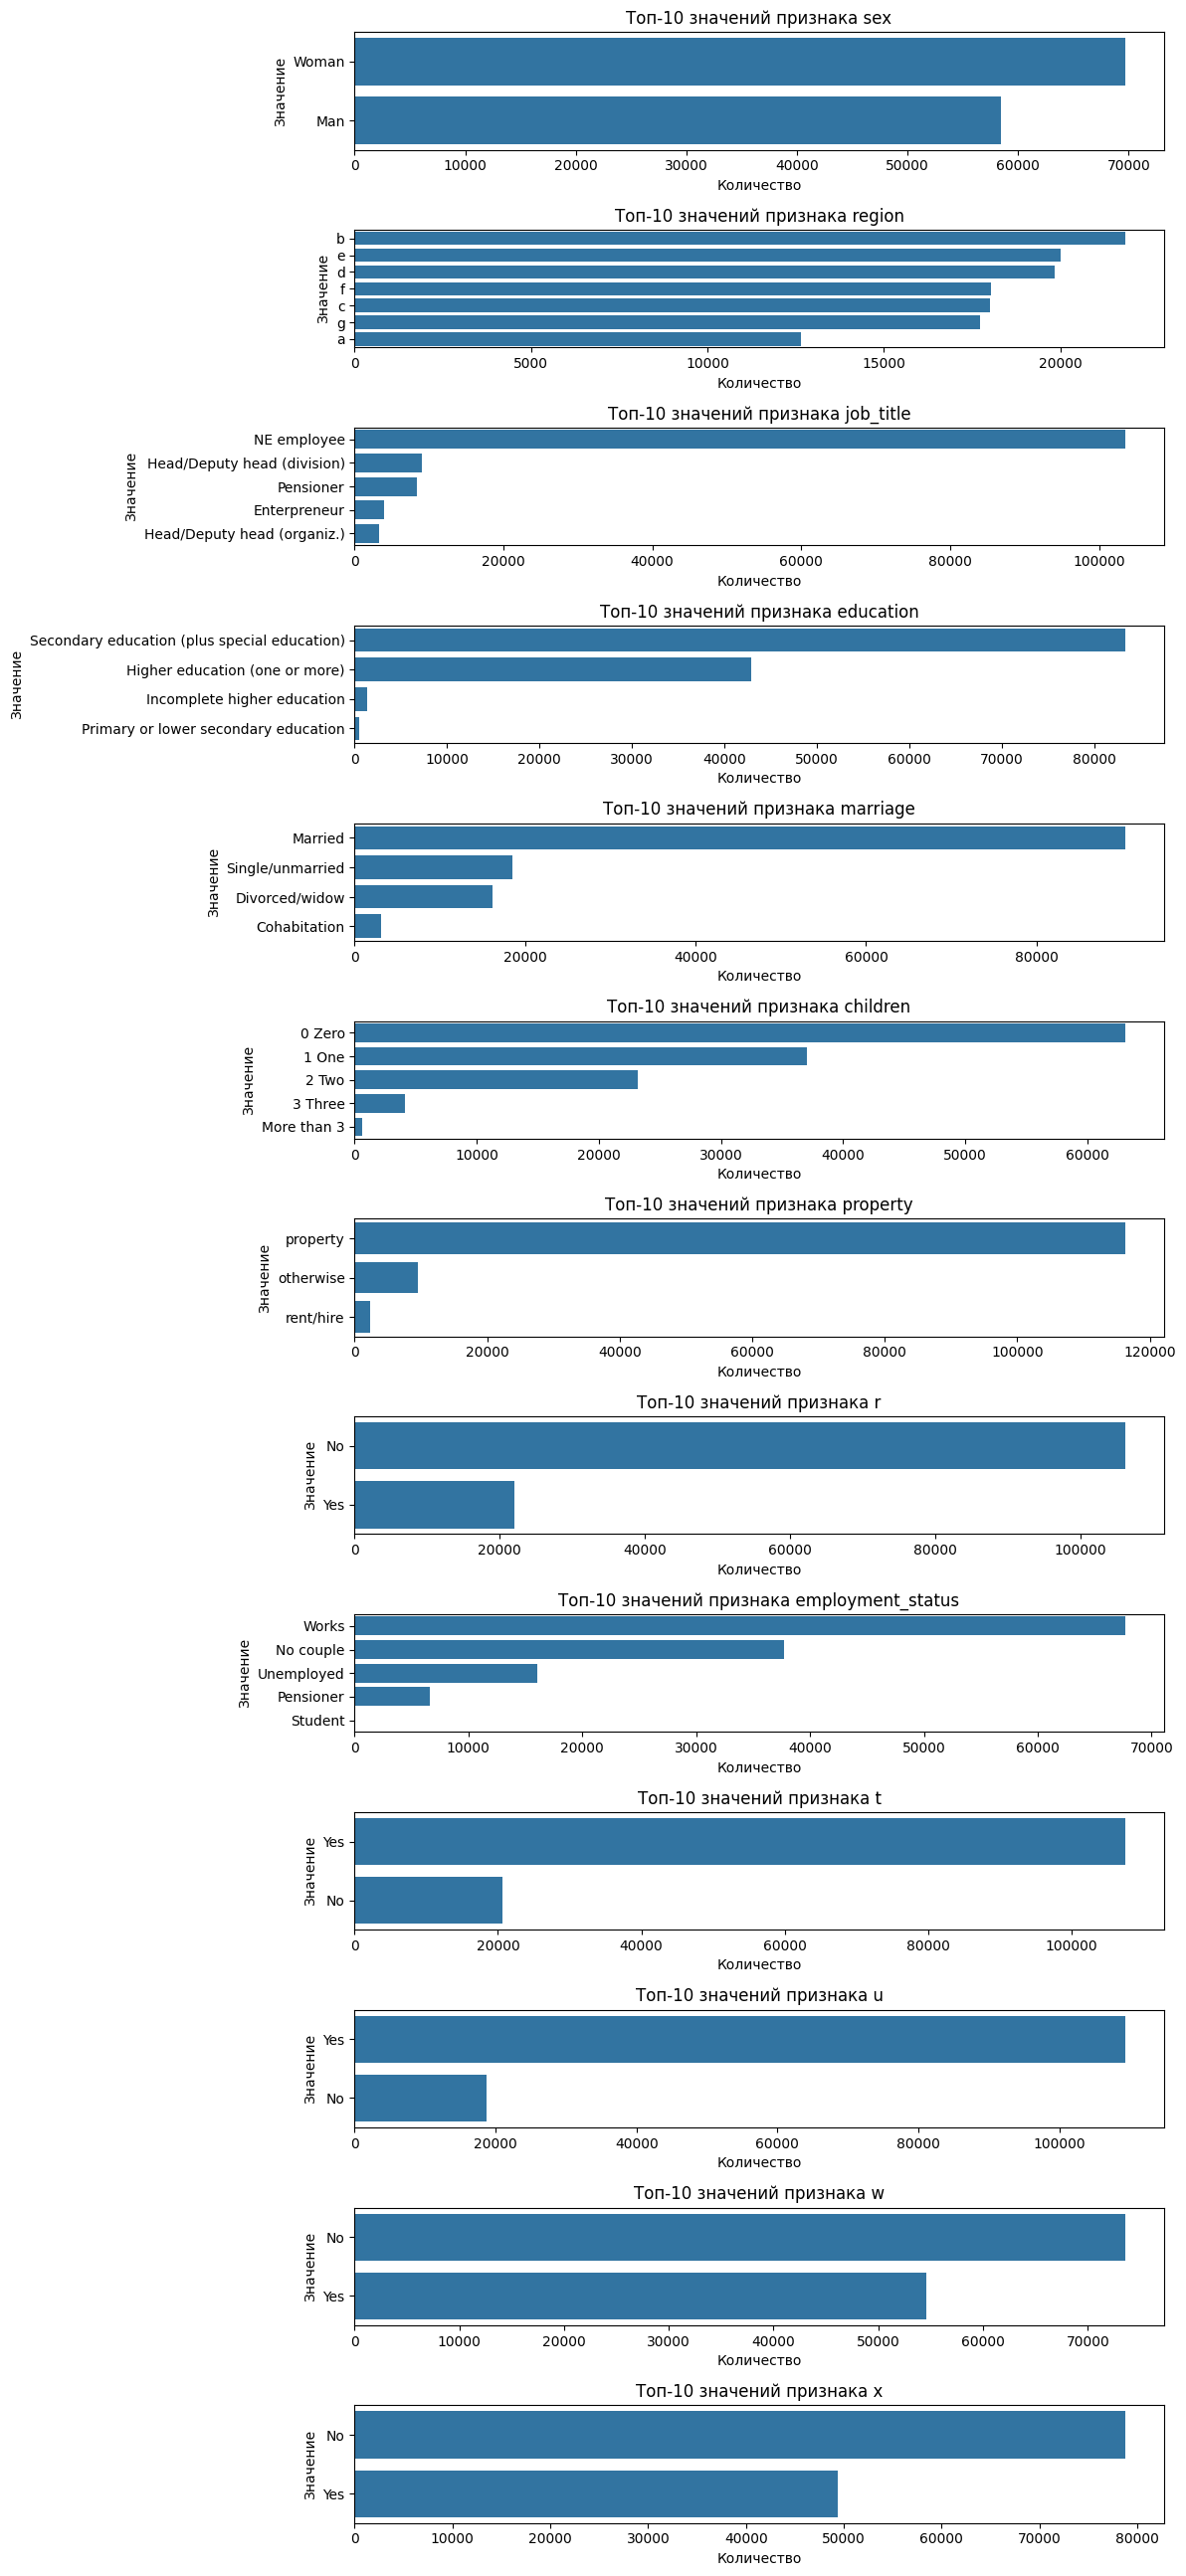


Количество пропущенных значений в категориальных признаках:
Series([], dtype: int64)

Кардинальность категориальных признаков:
              Признак  Уникальных значений  Кардинальность
1              region                    7        0.000055
2           job_title                    5        0.000039
5            children                    5        0.000039
8   employment_status                    5        0.000039
3           education                    4        0.000031
4            marriage                    4        0.000031
6            property                    3        0.000023
0                 sex                    2        0.000016
7                   r                    2        0.000016
9                   t                    2        0.000016
10                  u                    2        0.000016
11                  w                    2        0.000016
12                  x                    2        0.000016


In [59]:
# Визуализация распределений категориальных признаков
plt.figure(figsize=(12, 2 * len(categorical_columns)))

for idx, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, idx)
    value_counts = df[col].value_counts().head(10)
    sns.barplot(x=value_counts.values, y=value_counts.index)
    plt.title(f'Топ-10 значений признака {col}')
    plt.xlabel('Количество')
    plt.ylabel('Значение')

plt.tight_layout()
plt.show()

# Анализ пропущенных значений в категориальных признаках
missing_values = df[categorical_columns].isnull().sum()
print("\nКоличество пропущенных значений в категориальных признаках:")
print(missing_values[missing_values > 0])

# Анализ кардинальности (отношение уникальных значений к общему количеству)
cardinality = pd.DataFrame({
    'Признак': categorical_columns,
    'Уникальных значений': [df[col].nunique() for col in categorical_columns],
    'Кардинальность': [df[col].nunique() / len(df) for col in categorical_columns]
})
print("\nКардинальность категориальных признаков:")
print(cardinality.sort_values('Кардинальность', ascending=False))

In [60]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Создаем энкодер без удаления категорий
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(df[categorical_columns])
feature_names = encoder.get_feature_names_out(categorical_columns)

encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=df.index)

# Удаляем последний столбец для каждого категориального признака
cols_to_drop = []
for col in categorical_columns:
    # Находим все столбцы для этого признака
    col_columns = [c for c in encoded_df.columns if c.startswith(f"{col}_")]
    if col_columns:
        # Удаляем последний столбец
        cols_to_drop.append(col_columns[-1])

encoded_df = encoded_df.drop(columns=cols_to_drop)

# Собираем итоговый датасет
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

print("Размерность после OHE:", df_encoded.shape)
print("Удаленные столбцы:", cols_to_drop)

Размерность после OHE: (128139, 45)
Удаленные столбцы: ['sex_Woman', 'region_g', 'job_title_Pensioner', 'education_Secondary education (plus special education)', 'marriage_Single/unmarried', 'children_More than 3', 'property_rent/hire', 'r_Yes', 'employment_status_Works', 't_Yes', 'u_Yes', 'w_Yes', 'x_Yes']


In [61]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# OneHotEncoder c удалением первого столбца каждой категории
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(df_encoded[["v"]])
feature_names = encoder.get_feature_names_out(["v"])

encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=df_encoded.index)

# Собираем итоговый датасет
df_encoded = pd.concat([df_encoded.drop(columns="v"), encoded_df], axis=1)
df_encoded = df_encoded.drop(columns="v_No", axis=1)
print("Размерность после OHE:", df_encoded.shape)

Размерность после OHE: (128139, 46)


In [62]:
df_encoded


,id,a,b,c,d,e,f,g,h,age,...,employment_status_No couple,employment_status_Pensioner,employment_status_Student,employment_status_Unemployed,t_No,u_No,w_No,x_No,v_Few,v_Yes
0,1,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,33.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,33.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,38.583333,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,61.250000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,5,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,48.583333,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128134,38401,0.569320,0.237217,44.95,854.05,1.708100,0.711708,3,0.00,51.916667,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
128135,38402,0.072727,0.072727,45.86,413.14,0.751164,0.751164,13,1.99,56.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
128136,38403,0.095750,0.095750,57.48,172.42,0.287367,0.287367,3,0.00,25.500000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
128137,38404,0.042287,0.042287,422.00,1266.00,0.844000,0.844000,20,0.01,39.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [63]:
df_encoded.to_csv("TrainData.csv", sep=";")
df_encoded.head(100).to_csv("TrainData100.csv")

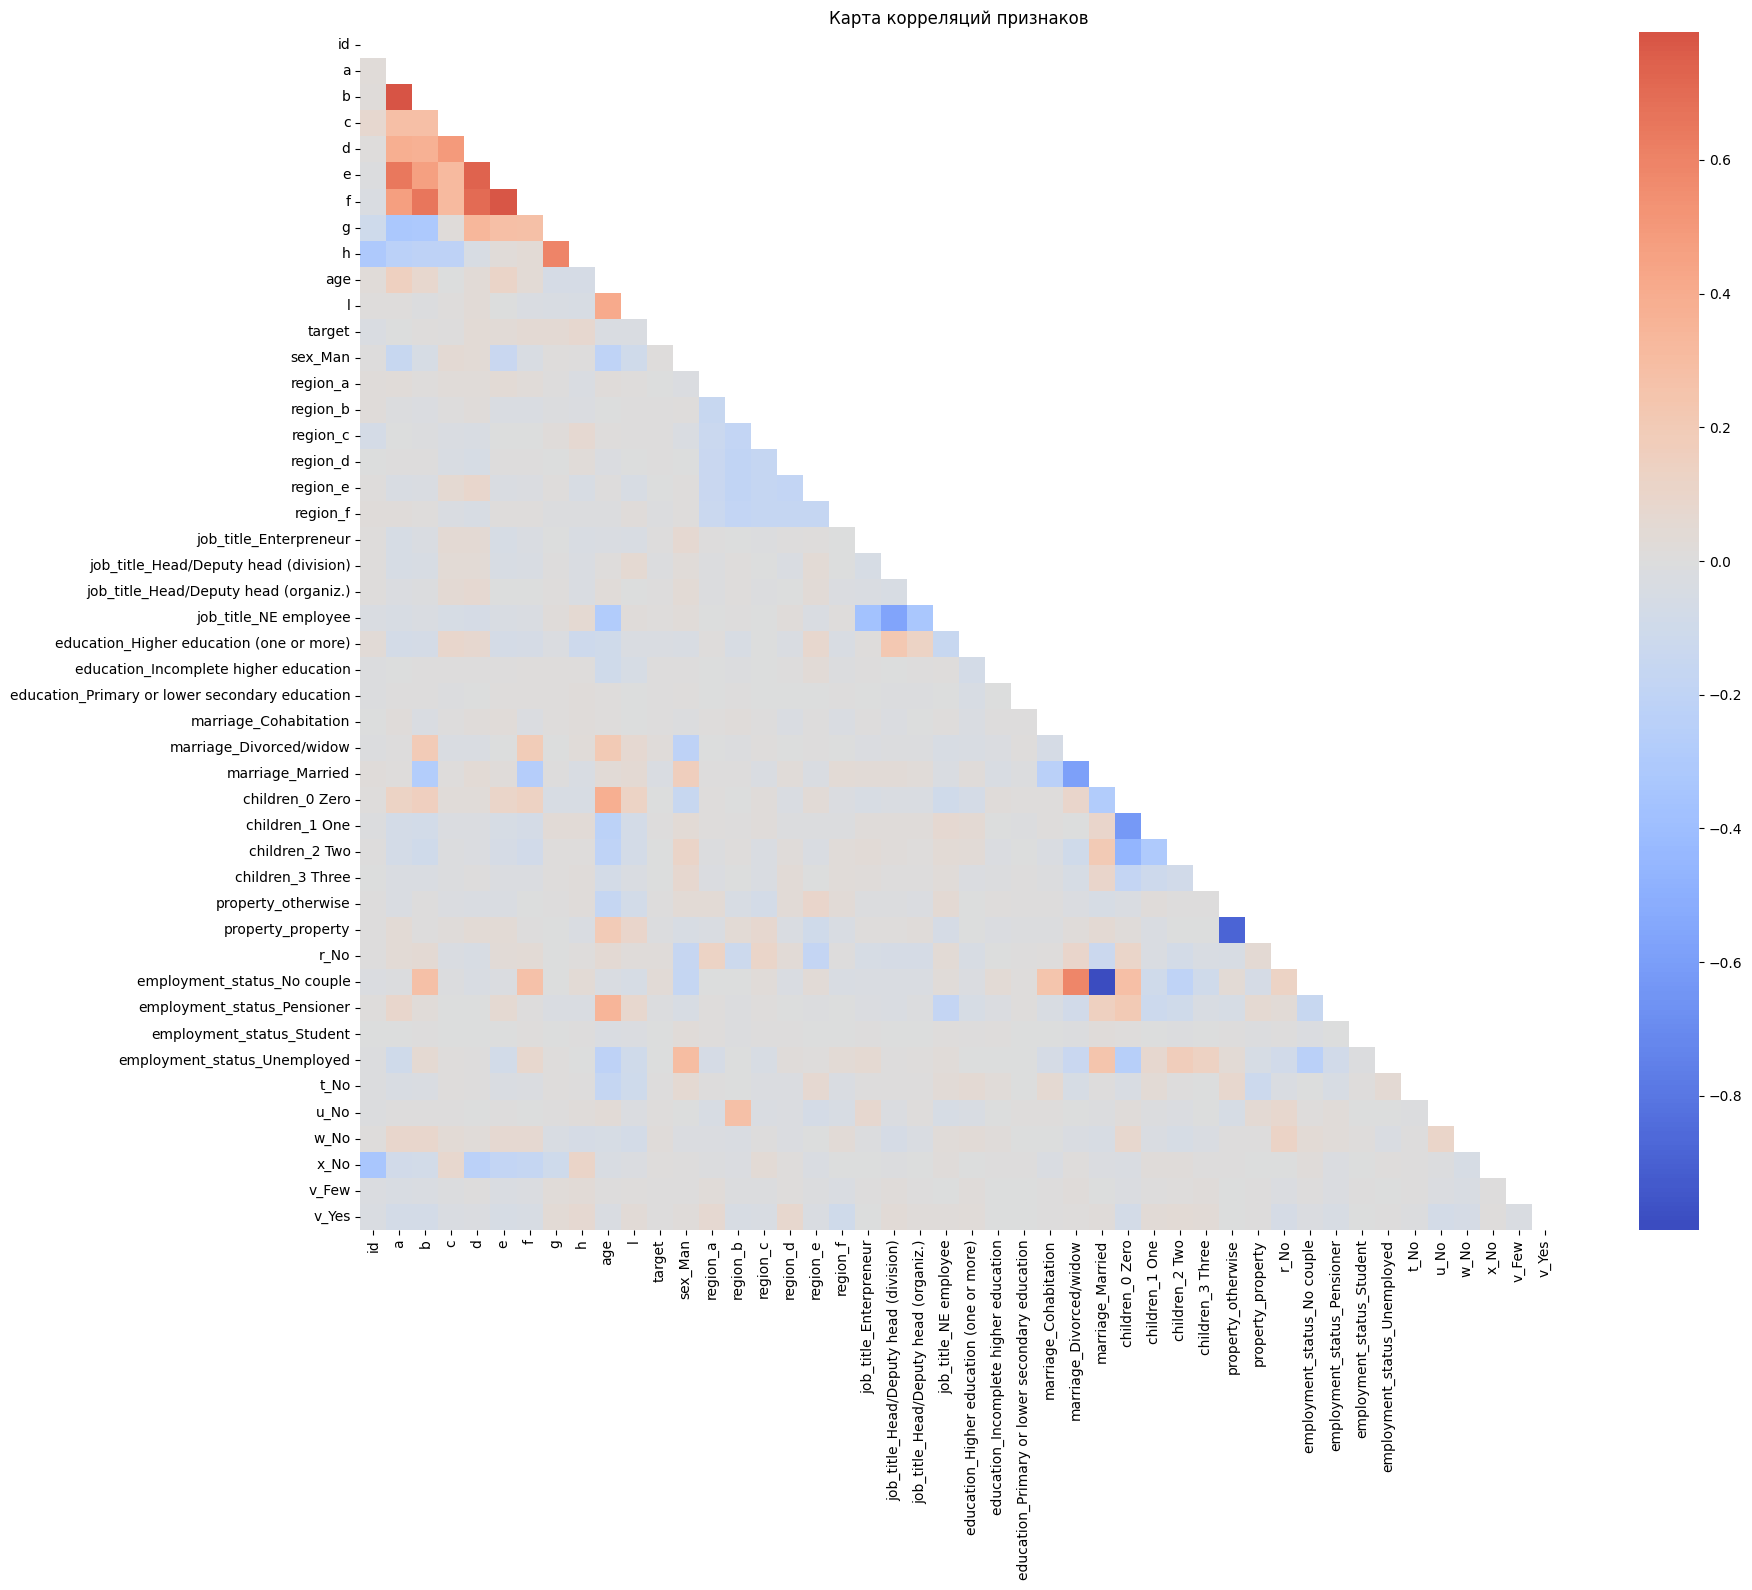

In [64]:
# Создаем карту корреляций
plt.figure(figsize=(20, 16))
correlation_matrix = df_encoded.corr()

# Используем маску для отображения только верхнего треугольника матрицы
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Создаем тепловую карту
sns.heatmap(correlation_matrix, 
            mask=mask,
            cmap='coolwarm',  # Цветовая схема
            center=0,  # Центральное значение для цветовой схемы
            square=True,  # Квадратные ячейки
            annot=False,  # Без отображения значений (их слишком много)
            )

plt.title('Карта корреляций признаков')
plt.tight_layout()
plt.show()





In [65]:
# Разбиваем age на 10 квантилей
df_encoded["age_bin"] = pd.qcut(df_encoded["age"], q=10, duplicates="drop")
df_encoded=df_encoded.drop(columns="age",axis=1)
# One-hot encoding для age_bin
df_encoded = pd.get_dummies(df_encoded, columns=["age_bin"], prefix="age_q", drop_first=True)


In [66]:
# One-hot encoding для g и h
df_encoded = pd.get_dummies(df_encoded, columns=["g", "h"], drop_first=True)

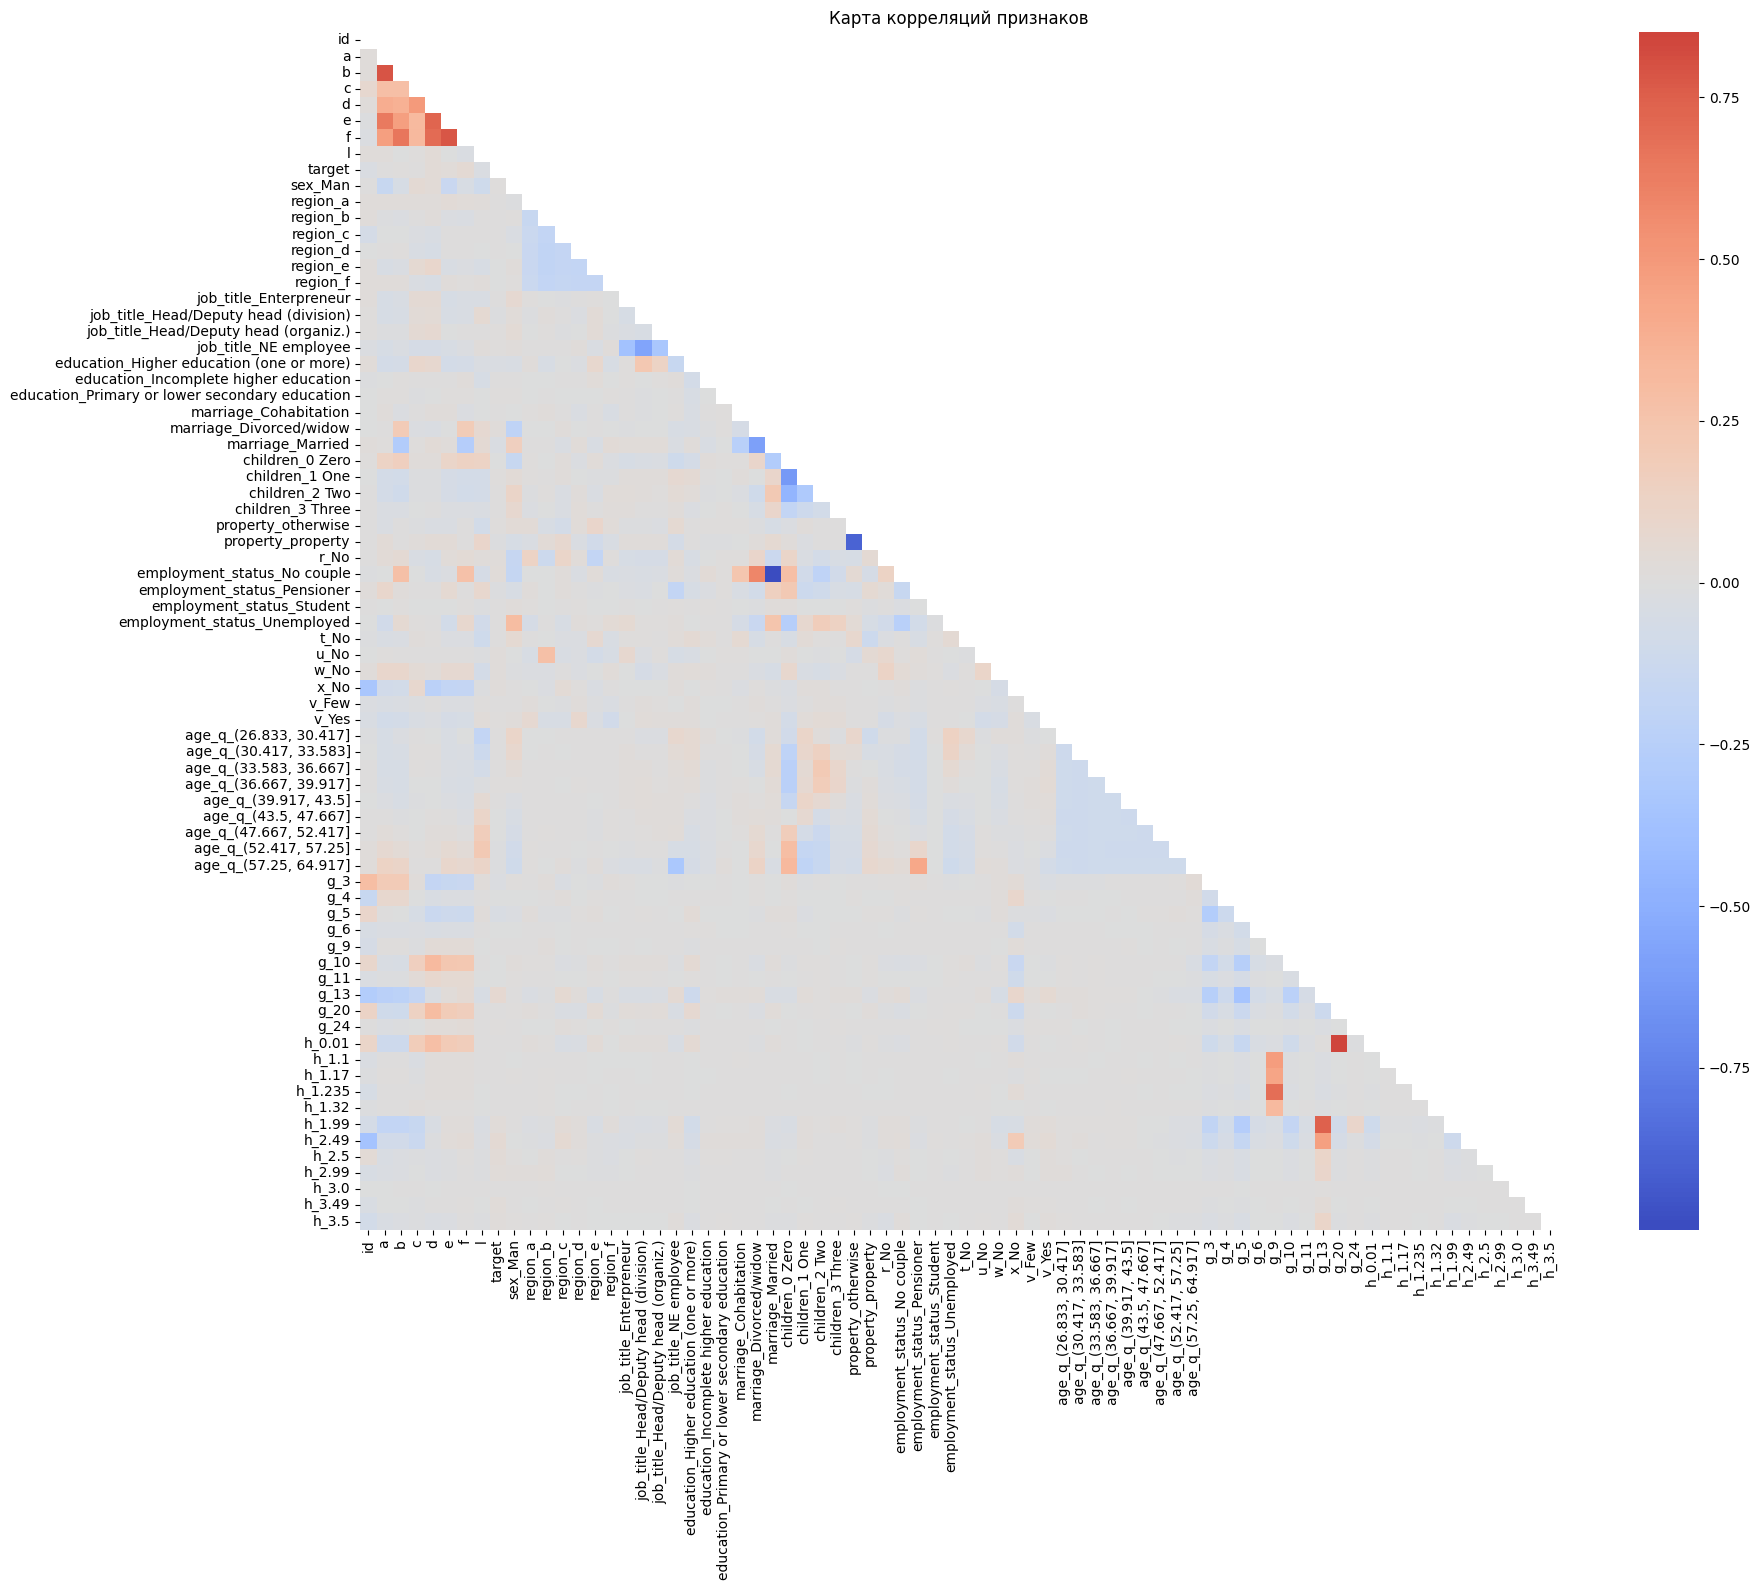

In [67]:
# Создаем карту корреляций
plt.figure(figsize=(20, 16))
correlation_matrix = df_encoded.corr()

# Используем маску для отображения только верхнего треугольника матрицы
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Создаем тепловую карту
sns.heatmap(correlation_matrix, 
            mask=mask,
            cmap='coolwarm',  # Цветовая схема
            center=0,  # Центральное значение для цветовой схемы
            square=True,  # Квадратные ячейки
            annot=False,  # Без отображения значений (их слишком много)
            )

plt.title('Карта корреляций признаков')
plt.tight_layout()
plt.show()





In [68]:
df_encoded.to_csv("TrainData.csv", sep=";",index=False)
df_encoded.head(100).to_csv("TrainData100.csv",index=False)

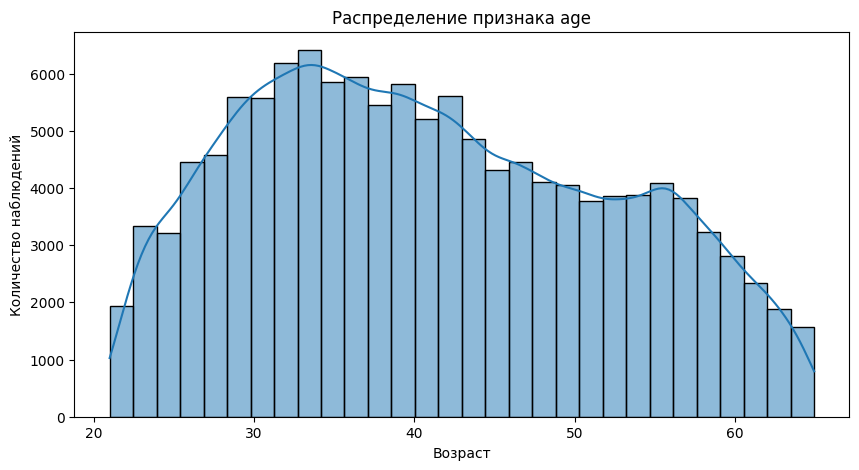


Средний target по квантилям возраста:
age_quantile
(20.999, 26.833]    0.007576
(26.833, 30.417]    0.003994
(30.417, 33.583]    0.004438
(33.583, 36.667]    0.003629
(36.667, 39.917]    0.005511
(39.917, 43.5]      0.004224
(43.5, 47.667]      0.002415
(47.667, 52.417]    0.002423
(52.417, 57.25]     0.002017
(57.25, 64.917]     0.001812
Name: target, dtype: float64


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Гистограмма распределения age
plt.figure(figsize=(10, 5))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Распределение признака age")
plt.xlabel("Возраст")
plt.ylabel("Количество наблюдений")
plt.show()

# Разобьем по квантилям (например, 5 групп)
df["age_quantile"] = pd.qcut(df["age"], q=10, duplicates="drop")

# Смотрим средний таргет по квантилям
print("\nСредний target по квантилям возраста:")
print(df.groupby("age_quantile")["target"].mean())

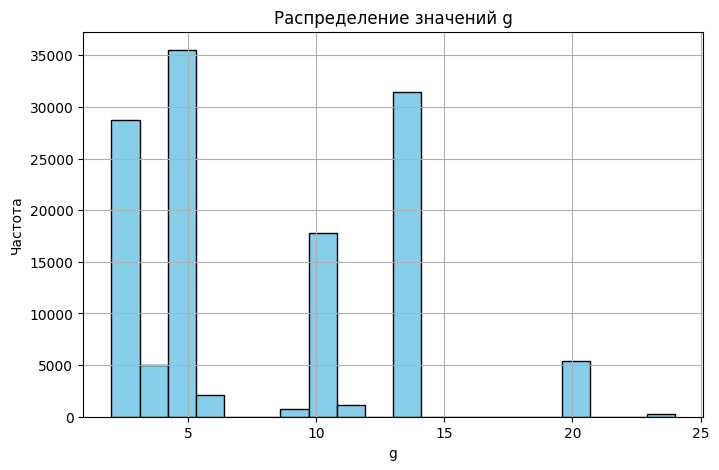

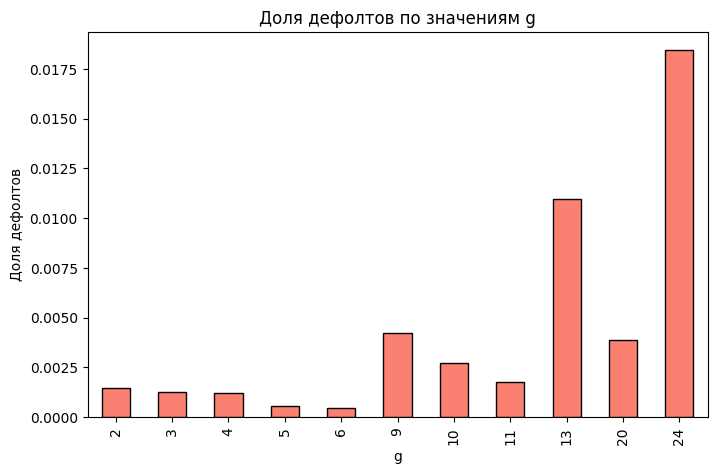

In [70]:
#  Проверка распределения g
plt.figure(figsize=(8, 5))
df['g'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение значений g')
plt.xlabel('g')
plt.ylabel('Частота')
plt.show()

#  Доля дефолтов по каждому значению g
default_rates = df.groupby('g')['target'].mean()

plt.figure(figsize=(8, 5))
default_rates.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Доля дефолтов по значениям g')
plt.xlabel('g')
plt.ylabel('Доля дефолтов')
plt.show()


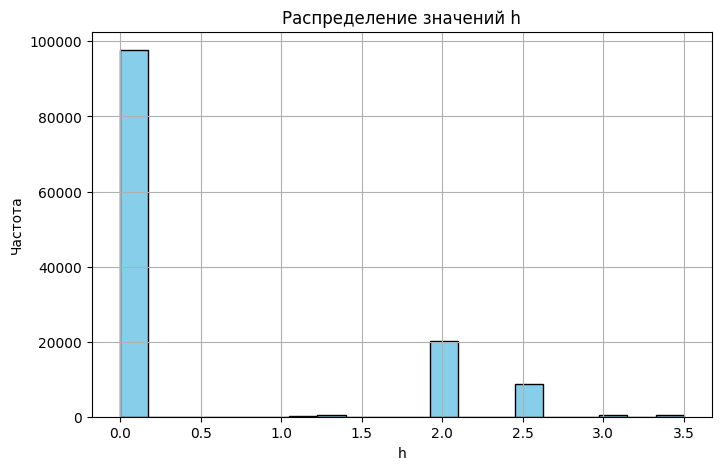

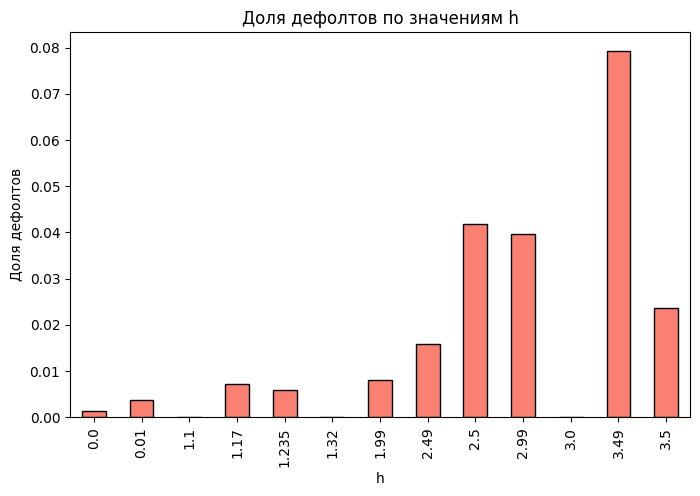

In [71]:
#  Проверка распределения h
plt.figure(figsize=(8, 5))
df['h'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение значений h')
plt.xlabel('h')
plt.ylabel('Частота')
plt.show()

#  Доля дефолтов по каждому значению h
default_rates = df.groupby('h')['target'].mean()

plt.figure(figsize=(8, 5))
default_rates.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Доля дефолтов по значениям h')
plt.xlabel('h')
plt.ylabel('Доля дефолтов')
plt.show()


In [72]:
# Берем только числовые признаки, исключаем id и target
num_cols = df.select_dtypes(include=["int64","float64"]).columns.drop(["id","target"])

# Считаем уникальные значения
for col in num_cols:
    unique_count = df[col].nunique()
    print(f"\nПризнак: {col}")
    print(f"Количество уникальных значений: {unique_count}")
    # Если уникальных мало — выводим сами значения
    if unique_count <= 20:
        print("Уникальные значения:", sorted(df[col].unique().tolist()))
    else:
        print("Примеры значений:", df[col].unique()[:10])



Признак: a
Количество уникальных значений: 57903
Примеры значений: [0.19877778 0.043      0.06707273 0.0527     0.14188    0.05465714
 0.11711429 0.08823077 0.07924242 0.0802963 ]

Признак: b
Количество уникальных значений: 72096
Примеры значений: [0.09938889 0.02126374 0.06707273 0.0527     0.14188    0.02550667
 0.0512375  0.08823077 0.07924242 0.04927273]

Признак: c
Количество уникальных значений: 13053
Примеры значений: [  0.    49.97  40.7   57.05  26.03  28.99 122.99  25.18  40.65 482.94]

Признак: d
Количество уникальных значений: 18049
Примеры значений: [799.9  173.03 329.9  235.65 634.45 171.1  366.6  512.85 233.87 223.9 ]

Признак: e
Количество уникальных значений: 64150
Примеры значений: [1.77755556 0.38451111 0.59981818 0.4713     1.2689     0.48885714
 1.04742857 0.789      0.70869697 0.82925926]

Признак: f
Количество уникальных значений: 77932
Примеры значений: [0.88877778 0.19014286 0.59981818 0.4713     1.2689     0.22813333
 0.45825    0.789      0.70869697 0.508863

In [73]:
# Настоящие числовые
real_numeric = ["a", "b", "c", "d", "e", "f", "l"]

# Псевдокатегориальные (числа, но мало уникальных значений)
pseudo_categorical = ["g", "h"]

print("Числовые признаки:", real_numeric)
print("Категориальные признаки:", pseudo_categorical)


Числовые признаки: ['a', 'b', 'c', 'd', 'e', 'f', 'l']
Категориальные признаки: ['g', 'h']


In [74]:
for real in real_numeric:
    print(f"Max {real} {df[real].max()}    Min {real} {df[real].min()}")

Max a 7.06725    Min a 1.628e-06
Max b 0.874025    Min b 1.205925925925926e-06
Max c 2682.42    Min c 0.0
Max d 4999.0    Min d 49.98
Max e 35.337    Min e 1.599e-05
Max f 10.352991452991452    Min f 1.1844444444444444e-05
Max l 545    Min l 0


In [75]:
# Числовые признаки
num_cols = real_numeric

def very_strong_outliers(series, k=5):
    """Выбросы по правилу k*IQR (по умолчанию 5*IQR)"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - k*IQR
    upper = Q3 + k*IQR
    return (series < lower) | (series > upper)

# Поиск очень явных выбросов
for col in num_cols:
    mask = very_strong_outliers(df[col], k=5) 
    outliers = df.loc[mask, col]
    if not outliers.empty:
        print(f"\nПризнак: {col}")
        print("Количество очень сильных выбросов:", len(outliers))
        print("Топ-5 наибольших выбросов:", outliers.sort_values(ascending=False).head(25).to_list())
        print("Топ-5 наименьших выбросов:", outliers.sort_values().head(5).to_list())


Признак: a
Количество очень сильных выбросов: 192
Топ-5 наибольших выбросов: [7.06725, 5.435499999999999, 3.7998, 3.79975, 3.53192, 3.2709, 3.0545, 2.891714285714285, 2.6666000000000003, 2.5652, 2.5331, 2.468, 2.3982222222222225, 2.349364161849711, 2.292888888888889, 2.259, 2.20825, 2.1849000000000003, 2.182, 2.1024000000000003, 2.0586470588235297, 1.9278, 1.82415625, 1.766, 1.7383000000000002]
Топ-5 наименьших выбросов: [0.98875, 0.9921, 0.9937666666666668, 0.9957666666666668, 0.9964285714285714]

Признак: b
Количество очень сильных выбросов: 342
Топ-5 наибольших выбросов: [0.874025, 0.8656571428571429, 0.8653272727272727, 0.8640222222222222, 0.8584264705882353, 0.8575291390950925, 0.851625, 0.8515857142857143, 0.84836, 0.84593, 0.843225, 0.8430833333333334, 0.8403103448275863, 0.8395818181818181, 0.8386666666666667, 0.8378461538461539, 0.8362, 0.8358923076923077, 0.8351805555555556, 0.8349428571428572, 0.83448087431694, 0.8340599999999999, 0.8329090909090909, 0.8328, 0.8324333333333

In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# список числовых признаков
real_numeric = ["a", "b", "c", "d", "e", "f", "l"]

# статистика до нормализации
print("ДО StandardScaler")
print(df_encoded[real_numeric].agg(["min", "max", "mean", "std"]).T)

# применяем StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_encoded[real_numeric])

# собираем обратно в DataFrame
df_scaled = pd.DataFrame(scaled_values, columns=real_numeric, index=df_encoded.index)

# статистика после нормализации
print("ПОСЛЕ")
print(df_scaled.agg(["min", "max", "mean", "std"]).T)


ДО StandardScaler
         min          max        mean         std
a   0.000002     7.067250    0.167154    0.152438
b   0.000001     0.874025    0.113162    0.104964
c   0.000000  2682.420000   85.704254  105.423363
d  49.980000  4999.000000  549.108039  450.407616
e   0.000016    35.337000    1.010326    0.911425
f   0.000012    10.352991    0.683103    0.622400
l   0.000000   545.000000  103.767659  100.340082
ПОСЛЕ
        min        max          mean       std
a -1.096530  45.265038  1.548190e-16  1.000004
b -1.078093   7.248832  2.249090e-16  1.000004
c -0.812956  24.631408  1.718979e-17  1.000004
d -1.108174   9.879738 -6.631932e-17  1.000004
e -1.108500  37.662790  6.920277e-17  1.000004
f -1.097515  15.536503  6.742834e-17  1.000004
l -1.034164   4.397386 -6.105148e-17  1.000004


In [77]:
df_encoded

,id,a,b,c,d,e,f,l,target,sex_Man,...,h_1.17,h_1.235,h_1.32,h_1.99,h_2.49,h_2.5,h_2.99,h_3.0,h_3.49,h_3.5
0,1,0.198778,0.099389,0.00,799.90,1.777556,0.888778,132,0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2,0.043000,0.021264,49.97,173.03,0.384511,0.190143,6,0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,3,0.067073,0.067073,0.00,329.90,0.599818,0.599818,71,0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,4,0.052700,0.052700,0.00,235.65,0.471300,0.471300,48,0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,5,0.141880,0.141880,0.00,634.45,1.268900,1.268900,48,0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128134,38401,0.569320,0.237217,44.95,854.05,1.708100,0.711708,360,0,1.0,...,0,0,0,0,0,0,0,0,0,0
128135,38402,0.072727,0.072727,45.86,413.14,0.751164,0.751164,12,0,0.0,...,0,0,0,1,0,0,0,0,0,0
128136,38403,0.095750,0.095750,57.48,172.42,0.287367,0.287367,18,0,0.0,...,0,0,0,0,0,0,0,0,0,0
128137,38404,0.042287,0.042287,422.00,1266.00,0.844000,0.844000,106,0,0.0,...,0,0,0,0,0,0,0,0,0,0
